<a href="https://colab.research.google.com/github/moni-sha96/student-result-system/blob/main/Copy_of_Amazon_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split ,  GridSearchCV
from sklearn.metrics import accuracy_score , classification_report
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
data = pd.read_csv('/content/SaaS-Sales.csv')

In [ ]:
data

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


In [ ]:
data.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Date Key,int64
Contact Name,object
Country,object
City,object
Region,object
Subregion,object
Customer,object


In [ ]:
data = pd.DataFrame(data)

In [ ]:
data

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


PRESCRIPTIVE ANALYSIS

In [ ]:
data.tail(10)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9984,9985,EMEA-2021-100251,5/17/2021,20210517,Charles Lee,United Kingdom,Leeds,EMEA,UKIR,UnitedHealth Group,1092,Healthcare,SMB,FinanceHub,HR60J3H8TZ,31.500,10,0.0,15.1200
9985,9986,EMEA-2021-100251,5/17/2021,20210517,Charles Lee,United Kingdom,Leeds,EMEA,UKIR,UnitedHealth Group,1092,Healthcare,SMB,Support,GM2B5HKSRM,55.600,4,0.0,16.1240
9986,9987,AMER-2022-125794,9/30/2022,20220930,Lucas Oliver,United States,New York City,AMER,NAMER,Panasonic,1091,Tech,SMB,Data Smasher,PO8DG1HX3V,36.240,1,0.0,15.2208
9987,9988,EMEA-2023-163629,11/18/2023,20231118,Dylan Dickens,Finland,Espoo,EMEA,NOR,Siemens,1043,Manufacturing,Strategic,Data Smasher,GGI2WZG0KP,79.990,1,0.0,28.7964
9988,9989,EMEA-2023-163629,11/18/2023,20231118,Dylan Dickens,Finland,Espoo,EMEA,NOR,Siemens,1043,Manufacturing,Strategic,Site Analytics,TFALA50KPS,206.100,5,0.0,55.6470
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


In [ ]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name',
       'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID',
       'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [ ]:
data.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Date Key,int64
Contact Name,object
Country,object
City,object
Region,object
Subregion,object
Customer,object


In [ ]:
data.shape


(9994, 19)

In [ ]:
data.isnull()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Date Key,0
Contact Name,0
Country,0
City,0
Region,0
Subregion,0
Customer,0


In [ ]:
data['City']

,City
0,Dublin
1,Dublin
2,New York City
3,Stuttgart
4,Stuttgart
...,...
9989,Hamburg
9990,Milwaukee
9991,Milwaukee
9992,Milwaukee


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

STATISTICAL ANALYSIS

In [ ]:
data['License'].value_counts()

,count
License,
3NTBV9B3PS,1
16GRM07R1K,1
QLIW57KZUV,1
JI6BVL70HQ,1
DE9GJKGD44,1
...,...
D8FGC56NNX,1
COK66F8IC1,1
FE5QJBIUN1,1


In [ ]:
data['Contact Name'].value_counts()

,count
Contact Name,
Leonard Kelly,37
Amelia Campbell,34
Gordon Parr,34
Tracey Dickens,34
Evan Ince,32
...,...
Brian Campbell,1
Joshua Gibson,1
Sam Randall,1


In [ ]:
data.nunique()

,0
Row ID,9994
Order ID,5009
Order Date,1237
Date Key,1237
Contact Name,793
Country,48
City,262
Region,3
Subregion,12
Customer,99


In [ ]:
data.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


DATA VISUALIZATION

one dimensional

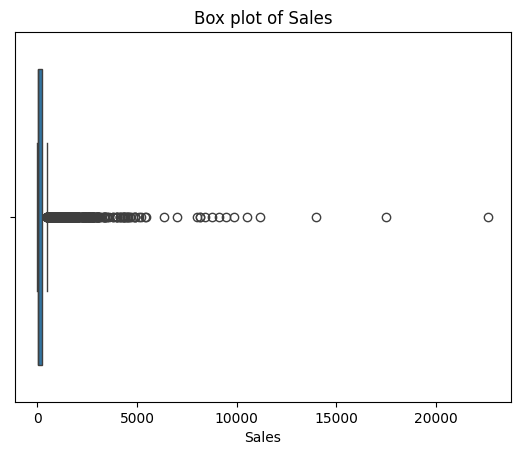

In [ ]:
sns.boxplot(x=data['Sales'])
plt.title("Box plot of Sales")
plt.show()

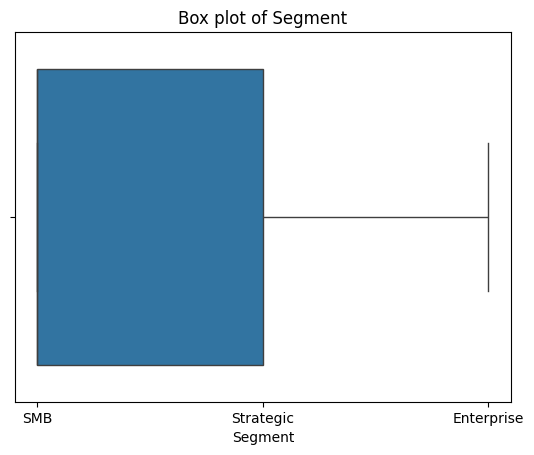

In [ ]:
sns.boxplot(x=data['Segment'])
plt.title("Box plot of Segment")
plt.show()

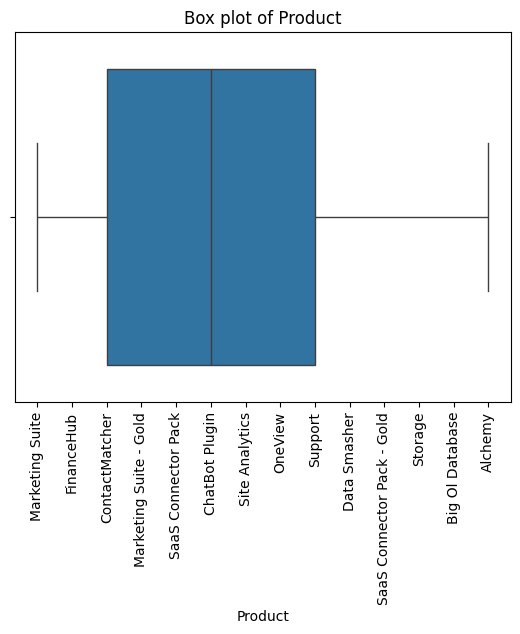

In [ ]:
sns.boxplot(x=data['Product'])
plt.title("Box plot of Product")
plt.xticks(rotation=90)
plt.show()

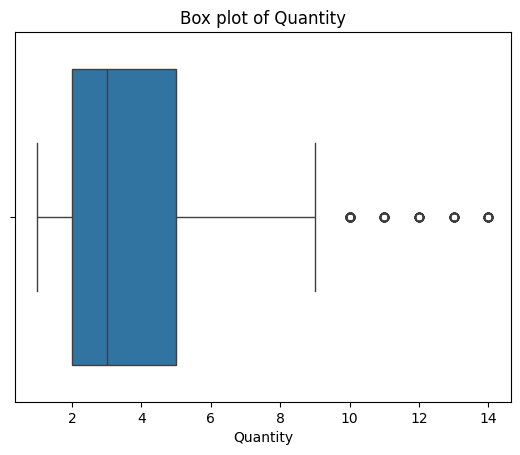

In [ ]:
sns.boxplot(x=data['Quantity'])
plt.title("Box plot of Quantity")
plt.show()

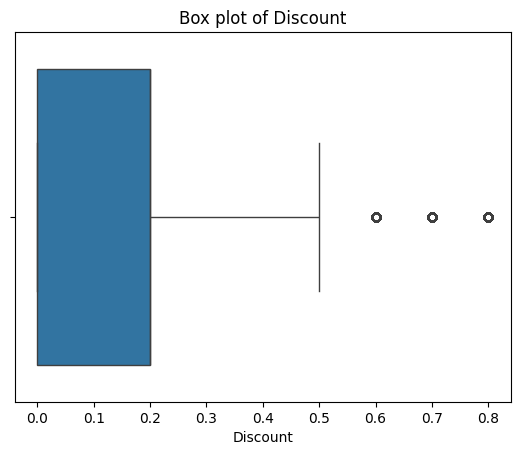

In [ ]:
sns.boxplot(x=data['Discount'])
plt.title("Box plot of Discount")
plt.show()

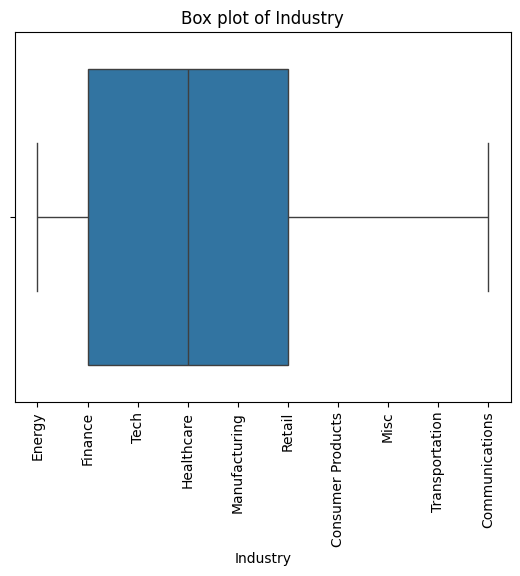

In [ ]:
sns.boxplot(x=data['Industry'])
plt.title("Box plot of Industry")
plt.xticks(rotation=90)
plt.show()

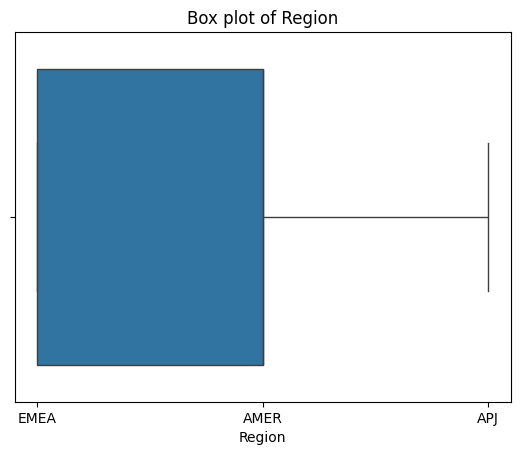

In [ ]:
sns.boxplot(x=data['Region'])
plt.title("Box plot of Region")
plt.show()

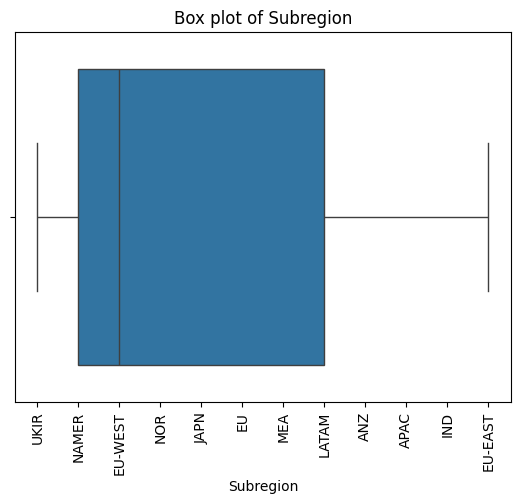

In [ ]:
sns.boxplot(x=data['Subregion'])
plt.title("Box plot of Subregion")
plt.xticks(rotation=90)
plt.show()

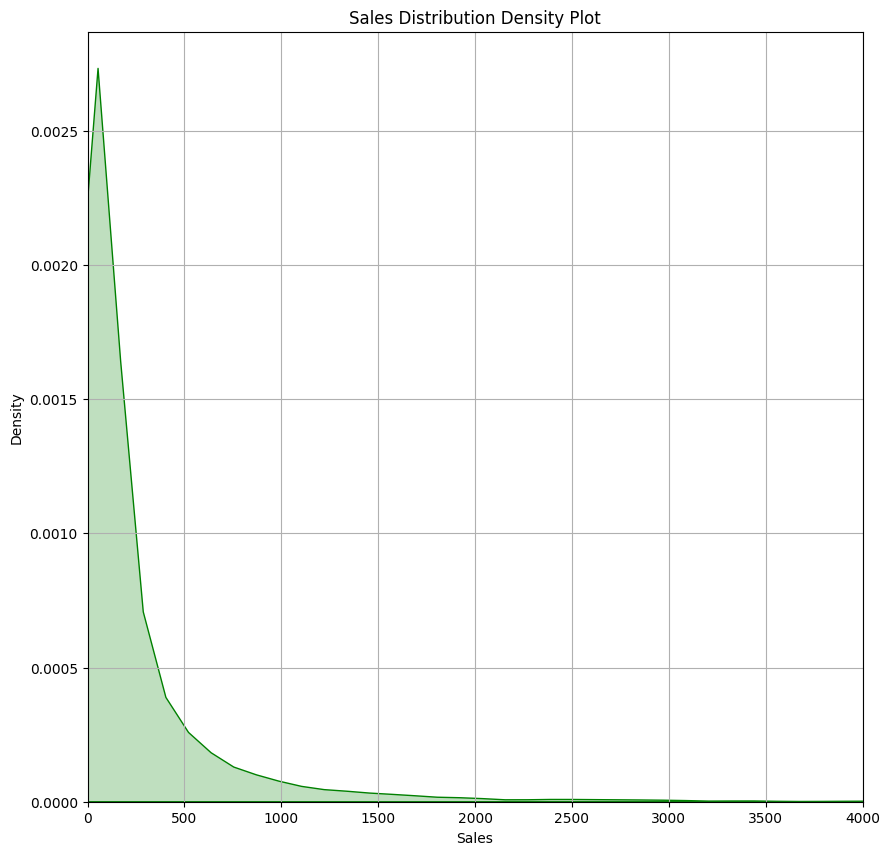

In [ ]:
plt.figure(figsize=(10 ,10))
sns.kdeplot(data['Sales'], fill=True, color='green')
plt.title('Sales Distribution Density Plot')
plt.xlim(0,4000)
plt.xlabel('Sales')
plt.ylabel('Density')
plt.grid(True)
plt.show()

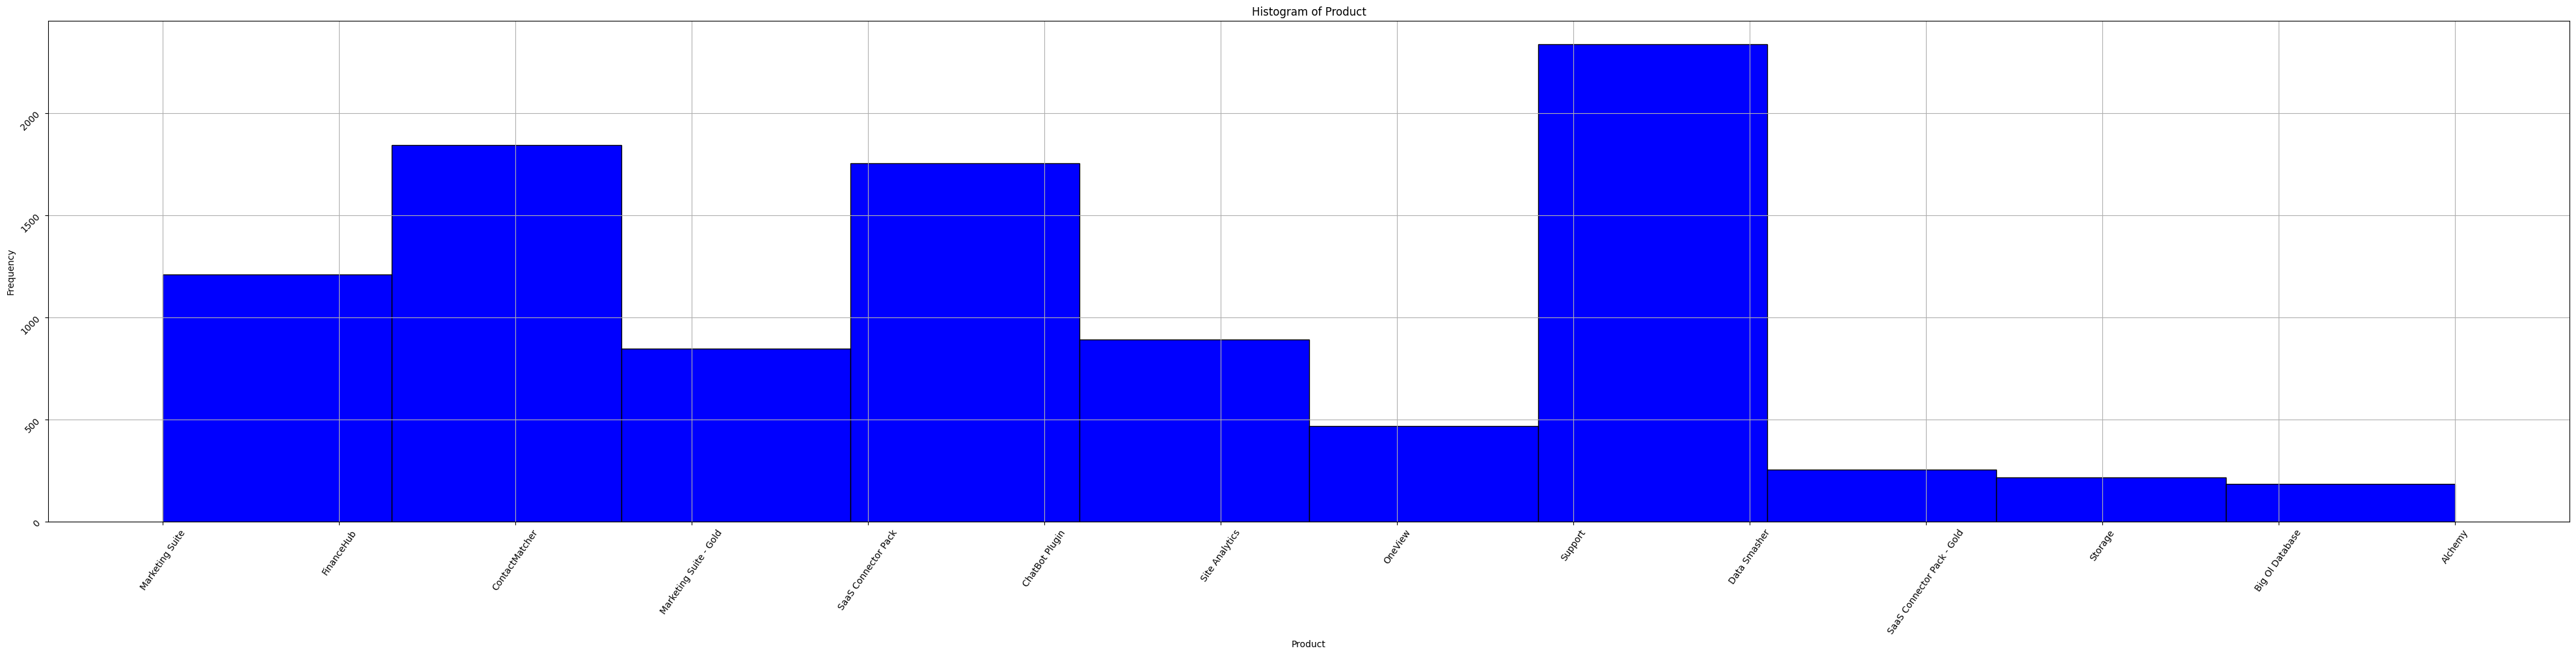

In [ ]:
plt.figure(figsize=(50,10))
plt.hist(data['Product'], color='blue', edgecolor='black')
plt.title('Histogram of Product')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.xticks(rotation=55)
plt.yticks(rotation=45)
plt.grid(True)
plt.show()

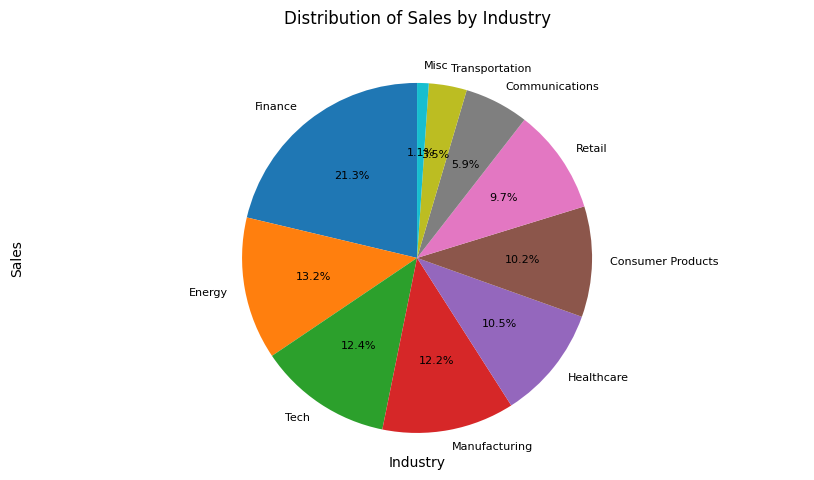

In [ ]:
plt.figure(figsize=(10,5))
plt.pie(data['Industry'].value_counts(), labels=data['Industry'].value_counts().index, autopct='%1.1f%%', startangle=90 ,textprops= {'fontsize' : 8} )
plt.title('Distribution of Sales by Industry', pad =30)
plt.axis('equal')
plt.xlabel('Industry')
plt.ylabel('Sales')
plt.xticks(rotation=40)
plt.yticks(rotation=0)
plt.show()

TWO DIMENSIONAL

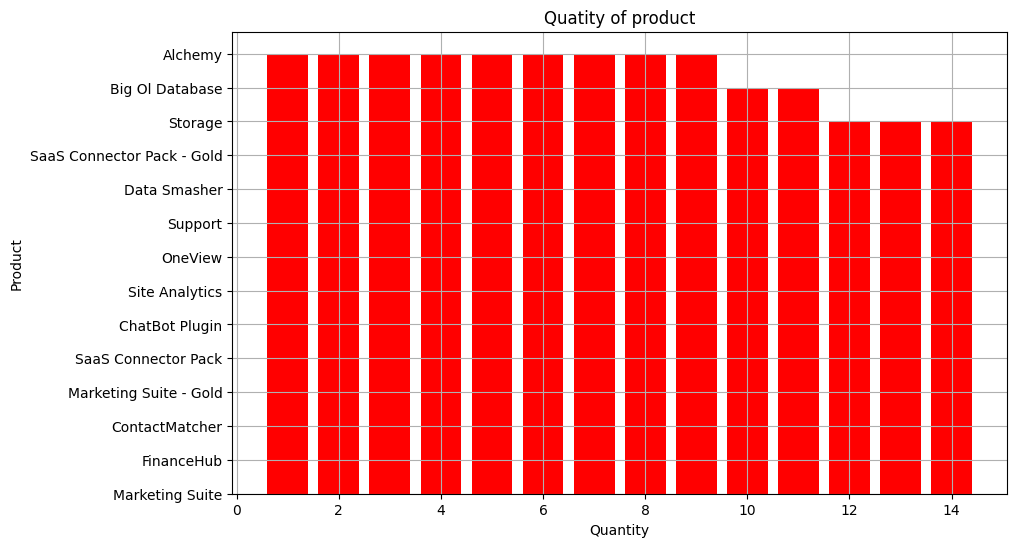

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(data['Quantity'],data['Product'],color='red')
plt.title('Quatity of product')
plt.xlabel('Quantity')
plt.ylabel('Product')
plt.grid(True)
plt.show()

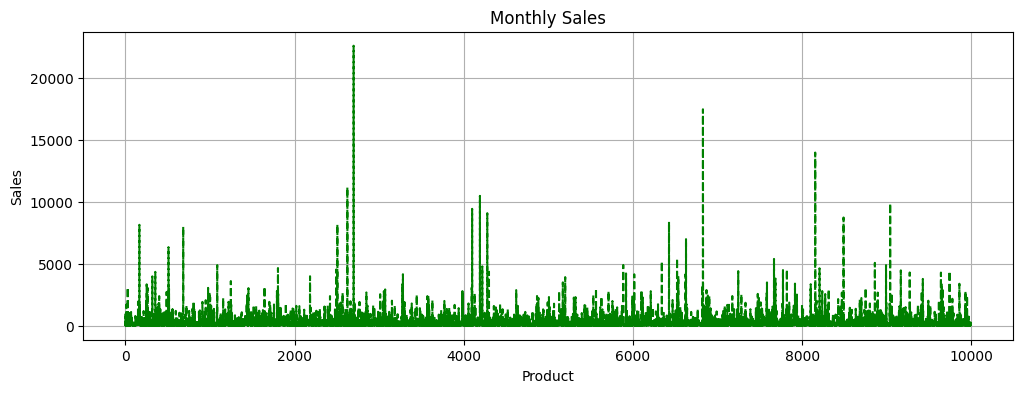

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(data['Sales'],linestyle='--',color='green')
plt.title('Monthly Sales')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

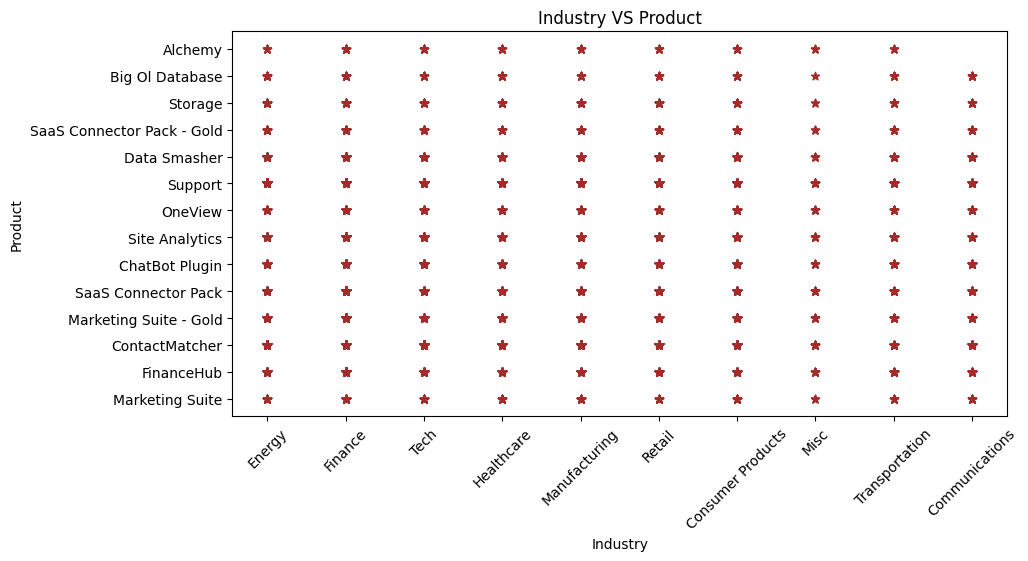

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(data['Industry'],data['Product'],color='brown', marker='*')
plt.title('Industry VS Product')
plt.xlabel('Industry')
plt.ylabel('Product')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()

In [ ]:
corr

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.014658,0.029609,-0.001359,-0.004016,0.013480,0.012497
Date Key,0.014658,1.000000,0.004108,-0.009799,-0.005097,-0.002767,0.004609
Customer ID,0.029609,0.004108,1.000000,0.003729,-0.006892,0.003068,0.006864
Sales,-0.001359,-0.009799,0.003729,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,-0.005097,-0.006892,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,-0.002767,0.003068,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,0.004609,0.006864,0.479064,0.066253,-0.219487,1.000000


In [ ]:
numeric_data

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
0,1,20221109,1017,261.9600,2,0.00,41.9136
1,2,20221109,1017,731.9400,3,0.00,219.5820
2,3,20220613,1056,14.6200,2,0.00,6.8714
3,4,20211011,1031,957.5775,5,0.45,-383.0310
4,5,20211011,1031,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...
9989,9990,20200122,1055,25.2480,3,0.20,4.1028
9990,9991,20230227,1005,91.9600,2,0.00,15.6332
9991,9992,20230227,1005,258.5760,2,0.20,19.3932
9992,9993,20230227,1005,29.6000,4,0.00,13.3200


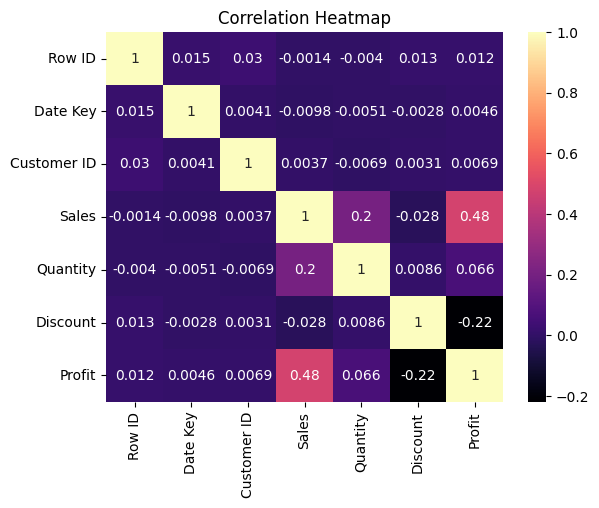

In [ ]:
sns.heatmap(numeric_data.corr(), annot=True, cmap='magma')
plt.title('Correlation Heatmap')
plt.show()

THREE DIMENSIONAL

In [ ]:
figure = go.Figure(data=[
    go.Scatter3d(
        x=data['Industry'],
        y=data['Product'],
        z=data['Quantity'],
        mode='lines+markers',
        line=dict(color='black', width=2),
        marker=dict(size=4, color='blue')
    )
])

figure.update_layout(title='Industry  vs Product vs Quantity',
                     scene = dict(
                         xaxis_title='Industry',
                         yaxis_title='Product',
                         zaxis_title='Quantity'))
figure.show()

DATA PREPROCESSSING

In [ ]:
data = data.drop(columns=['Row ID'])

In [ ]:
data

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


In [ ]:
data = data.drop(columns=['Order ID'])

In [ ]:
data

,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


In [ ]:
data = data.drop(columns=['License'])

In [ ]:
data

,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,25.2480,3,0.20,4.1028
9990,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,91.9600,2,0.00,15.6332
9991,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,258.5760,2,0.20,19.3932
9992,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,29.6000,4,0.00,13.3200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    9994 non-null   object 
 1   Date Key      9994 non-null   int64  
 2   Contact Name  9994 non-null   object 
 3   Country       9994 non-null   object 
 4   City          9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Subregion     9994 non-null   object 
 7   Customer      9994 non-null   object 
 8   Customer ID   9994 non-null   int64  
 9   Industry      9994 non-null   object 
 10  Segment       9994 non-null   object 
 11  Product       9994 non-null   object 
 12  Sales         9994 non-null   float64
 13  Quantity      9994 non-null   int64  
 14  Discount      9994 non-null   float64
 15  Profit        9994 non-null   float64
dtypes: float64(3), int64(3), object(10)
memory usage: 1.2+ MB


LABEL ENCODER

In [ ]:
le= LabelEncoder()

In [ ]:
data['Contact Name']=le.fit_transform(data['Contact Name'])

In [ ]:
data

,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,11/9/2022,20221109,574,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,11/9/2022,20221109,574,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,6/13/2022,20220613,190,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,10/11/2021,20211011,791,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,10/11/2021,20211011,791,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1/22/2020,20200122,181,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,25.2480,3,0.20,4.1028
9990,2/27/2023,20230227,68,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,91.9600,2,0.00,15.6332
9991,2/27/2023,20230227,68,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,258.5760,2,0.20,19.3932
9992,2/27/2023,20230227,68,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,29.6000,4,0.00,13.3200


In [ ]:
data['Country']=le.fit_transform(data['Country'])

In [ ]:
data

,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,11/9/2022,20221109,574,21,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,11/9/2022,20221109,574,21,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,6/13/2022,20220613,190,47,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,10/11/2021,20211011,791,16,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,10/11/2021,20211011,791,16,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1/22/2020,20200122,181,16,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,25.2480,3,0.20,4.1028
9990,2/27/2023,20230227,68,47,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,91.9600,2,0.00,15.6332
9991,2/27/2023,20230227,68,47,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,258.5760,2,0.20,19.3932
9992,2/27/2023,20230227,68,47,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,29.6000,4,0.00,13.3200


In [ ]:
data['City']=le.fit_transform(data['City'])

In [ ]:
data

,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,11/9/2022,20221109,574,21,73,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,11/9/2022,20221109,574,21,73,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,6/13/2022,20220613,190,47,166,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,10/11/2021,20211011,791,16,224,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,10/11/2021,20211011,791,16,224,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1/22/2020,20200122,181,16,93,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,25.2480,3,0.20,4.1028
9990,2/27/2023,20230227,68,47,155,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,91.9600,2,0.00,15.6332
9991,2/27/2023,20230227,68,47,155,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,258.5760,2,0.20,19.3932
9992,2/27/2023,20230227,68,47,155,AMER,NAMER,American Express,1005,Finance,SMB,Support,29.6000,4,0.00,13.3200


In [ ]:
data['Region']=le.fit_transform(data['Region'])

In [ ]:
data

,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,11/9/2022,20221109,574,21,73,2,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,11/9/2022,20221109,574,21,73,2,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,6/13/2022,20220613,190,47,166,0,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,10/11/2021,20211011,791,16,224,2,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,10/11/2021,20211011,791,16,224,2,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1/22/2020,20200122,181,16,93,2,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,25.2480,3,0.20,4.1028
9990,2/27/2023,20230227,68,47,155,0,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,91.9600,2,0.00,15.6332
9991,2/27/2023,20230227,68,47,155,0,NAMER,American Express,1005,Finance,SMB,Site Analytics,258.5760,2,0.20,19.3932
9992,2/27/2023,20230227,68,47,155,0,NAMER,American Express,1005,Finance,SMB,Support,29.6000,4,0.00,13.3200


In [ ]:
data['Subregion']=le.fit_transform(data['Subregion'])

In [ ]:
data

,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,11/9/2022,20221109,574,21,73,2,11,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,11/9/2022,20221109,574,21,73,2,11,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,6/13/2022,20220613,190,47,166,0,9,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,10/11/2021,20211011,791,16,224,2,4,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,10/11/2021,20211011,791,16,224,2,4,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1/22/2020,20200122,181,16,93,2,4,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,25.2480,3,0.20,4.1028
9990,2/27/2023,20230227,68,47,155,0,9,American Express,1005,Finance,SMB,SaaS Connector Pack,91.9600,2,0.00,15.6332
9991,2/27/2023,20230227,68,47,155,0,9,American Express,1005,Finance,SMB,Site Analytics,258.5760,2,0.20,19.3932
9992,2/27/2023,20230227,68,47,155,0,9,American Express,1005,Finance,SMB,Support,29.6000,4,0.00,13.3200


In [ ]:
data['Customer']=le.fit_transform(data['Customer'])

In [ ]:
data

,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,11/9/2022,20221109,574,21,73,2,11,23,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,11/9/2022,20221109,574,21,73,2,11,23,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,6/13/2022,20220613,190,47,166,0,9,74,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,10/11/2021,20211011,791,16,224,2,4,77,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,10/11/2021,20211011,791,16,224,2,4,77,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1/22/2020,20200122,181,16,93,2,4,53,1055,Healthcare,SMB,SaaS Connector Pack,25.2480,3,0.20,4.1028
9990,2/27/2023,20230227,68,47,155,0,9,8,1005,Finance,SMB,SaaS Connector Pack,91.9600,2,0.00,15.6332
9991,2/27/2023,20230227,68,47,155,0,9,8,1005,Finance,SMB,Site Analytics,258.5760,2,0.20,19.3932
9992,2/27/2023,20230227,68,47,155,0,9,8,1005,Finance,SMB,Support,29.6000,4,0.00,13.3200


In [ ]:
data['Industry']=le.fit_transform(data['Industry'])

In [ ]:
data

,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,11/9/2022,20221109,574,21,73,2,11,23,1017,2,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,11/9/2022,20221109,574,21,73,2,11,23,1017,2,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,6/13/2022,20220613,190,47,166,0,9,74,1056,2,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,10/11/2021,20211011,791,16,224,2,4,77,1031,2,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,10/11/2021,20211011,791,16,224,2,4,77,1031,2,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1/22/2020,20200122,181,16,93,2,4,53,1055,4,SMB,SaaS Connector Pack,25.2480,3,0.20,4.1028
9990,2/27/2023,20230227,68,47,155,0,9,8,1005,3,SMB,SaaS Connector Pack,91.9600,2,0.00,15.6332
9991,2/27/2023,20230227,68,47,155,0,9,8,1005,3,SMB,Site Analytics,258.5760,2,0.20,19.3932
9992,2/27/2023,20230227,68,47,155,0,9,8,1005,3,SMB,Support,29.6000,4,0.00,13.3200


In [ ]:
data['Segment']=le.fit_transform(data['Segment'])

In [ ]:
data

,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,11/9/2022,20221109,574,21,73,2,11,23,1017,2,1,Marketing Suite,261.9600,2,0.00,41.9136
1,11/9/2022,20221109,574,21,73,2,11,23,1017,2,1,FinanceHub,731.9400,3,0.00,219.5820
2,6/13/2022,20220613,190,47,166,0,9,74,1056,2,2,FinanceHub,14.6200,2,0.00,6.8714
3,10/11/2021,20211011,791,16,224,2,4,77,1031,2,1,ContactMatcher,957.5775,5,0.45,-383.0310
4,10/11/2021,20211011,791,16,224,2,4,77,1031,2,1,Marketing Suite - Gold,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1/22/2020,20200122,181,16,93,2,4,53,1055,4,1,SaaS Connector Pack,25.2480,3,0.20,4.1028
9990,2/27/2023,20230227,68,47,155,0,9,8,1005,3,1,SaaS Connector Pack,91.9600,2,0.00,15.6332
9991,2/27/2023,20230227,68,47,155,0,9,8,1005,3,1,Site Analytics,258.5760,2,0.20,19.3932
9992,2/27/2023,20230227,68,47,155,0,9,8,1005,3,1,Support,29.6000,4,0.00,13.3200


In [ ]:
data['Product']=le.fit_transform(data['Product'])

In [ ]:
data

,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,11/9/2022,20221109,574,21,73,2,11,23,1017,2,1,6,261.9600,2,0.00,41.9136
1,11/9/2022,20221109,574,21,73,2,11,23,1017,2,1,5,731.9400,3,0.00,219.5820
2,6/13/2022,20220613,190,47,166,0,9,74,1056,2,2,5,14.6200,2,0.00,6.8714
3,10/11/2021,20211011,791,16,224,2,4,77,1031,2,1,3,957.5775,5,0.45,-383.0310
4,10/11/2021,20211011,791,16,224,2,4,77,1031,2,1,7,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1/22/2020,20200122,181,16,93,2,4,53,1055,4,1,9,25.2480,3,0.20,4.1028
9990,2/27/2023,20230227,68,47,155,0,9,8,1005,3,1,9,91.9600,2,0.00,15.6332
9991,2/27/2023,20230227,68,47,155,0,9,8,1005,3,1,11,258.5760,2,0.20,19.3932
9992,2/27/2023,20230227,68,47,155,0,9,8,1005,3,1,13,29.6000,4,0.00,13.3200


In [ ]:
data['Discount']=le.fit_transform(data['Discount'])

In [ ]:
data

,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,11/9/2022,20221109,574,21,73,2,11,23,1017,2,1,6,261.9600,2,0,41.9136
1,11/9/2022,20221109,574,21,73,2,11,23,1017,2,1,5,731.9400,3,0,219.5820
2,6/13/2022,20220613,190,47,166,0,9,74,1056,2,2,5,14.6200,2,0,6.8714
3,10/11/2021,20211011,791,16,224,2,4,77,1031,2,1,3,957.5775,5,7,-383.0310
4,10/11/2021,20211011,791,16,224,2,4,77,1031,2,1,7,22.3680,2,3,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1/22/2020,20200122,181,16,93,2,4,53,1055,4,1,9,25.2480,3,3,4.1028
9990,2/27/2023,20230227,68,47,155,0,9,8,1005,3,1,9,91.9600,2,0,15.6332
9991,2/27/2023,20230227,68,47,155,0,9,8,1005,3,1,11,258.5760,2,3,19.3932
9992,2/27/2023,20230227,68,47,155,0,9,8,1005,3,1,13,29.6000,4,0,13.3200


In [ ]:
data['Order Date']=le.fit_transform(data['Order Date'])

In [ ]:
data

,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,308,20221109,574,21,73,2,11,23,1017,2,1,6,261.9600,2,0,41.9136
1,308,20221109,574,21,73,2,11,23,1017,2,1,5,731.9400,3,0,219.5820
2,840,20220613,190,47,166,0,9,74,1056,2,2,5,14.6200,2,0,6.8714
3,93,20211011,791,16,224,2,4,77,1031,2,1,3,957.5775,5,7,-383.0310
4,93,20211011,791,16,224,2,4,77,1031,2,1,7,22.3680,2,3,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,34,20200122,181,16,93,2,4,53,1055,4,1,9,25.2480,3,3,4.1028
9990,479,20230227,68,47,155,0,9,8,1005,3,1,9,91.9600,2,0,15.6332
9991,479,20230227,68,47,155,0,9,8,1005,3,1,11,258.5760,2,3,19.3932
9992,479,20230227,68,47,155,0,9,8,1005,3,1,13,29.6000,4,0,13.3200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    9994 non-null   int64  
 1   Date Key      9994 non-null   int64  
 2   Contact Name  9994 non-null   int64  
 3   Country       9994 non-null   int64  
 4   City          9994 non-null   int64  
 5   Region        9994 non-null   int64  
 6   Subregion     9994 non-null   int64  
 7   Customer      9994 non-null   int64  
 8   Customer ID   9994 non-null   int64  
 9   Industry      9994 non-null   int64  
 10  Segment       9994 non-null   int64  
 11  Product       9994 non-null   int64  
 12  Sales         9994 non-null   float64
 13  Quantity      9994 non-null   int64  
 14  Discount      9994 non-null   int64  
 15  Profit        9994 non-null   float64
dtypes: float64(2), int64(14)
memory usage: 1.2 MB


In [ ]:
data

,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,308,20221109,574,21,73,2,11,23,1017,2,1,6,261.9600,2,0,41.9136
1,308,20221109,574,21,73,2,11,23,1017,2,1,5,731.9400,3,0,219.5820
2,840,20220613,190,47,166,0,9,74,1056,2,2,5,14.6200,2,0,6.8714
3,93,20211011,791,16,224,2,4,77,1031,2,1,3,957.5775,5,7,-383.0310
4,93,20211011,791,16,224,2,4,77,1031,2,1,7,22.3680,2,3,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,34,20200122,181,16,93,2,4,53,1055,4,1,9,25.2480,3,3,4.1028
9990,479,20230227,68,47,155,0,9,8,1005,3,1,9,91.9600,2,0,15.6332
9991,479,20230227,68,47,155,0,9,8,1005,3,1,11,258.5760,2,3,19.3932
9992,479,20230227,68,47,155,0,9,8,1005,3,1,13,29.6000,4,0,13.3200


In [ ]:
data.nunique()

,0
Order Date,1237
Date Key,1237
Contact Name,793
Country,48
City,262
Region,3
Subregion,12
Customer,99
Customer ID,99
Industry,10


In [ ]:
ss= StandardScaler()

In [ ]:
data_Standardized = pd.DataFrame(ss.fit_transform(data), columns=data.columns)

In [ ]:
data_Standardized

,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,-0.862295,0.274286,0.756179,-0.442001,-1.127389,1.065557,1.337621,-0.836885,-1.102768,-0.818209,-0.181459,-0.260754,0.051510,-0.804303,-0.772031,0.056593
1,-0.862295,0.274286,0.756179,-0.442001,-1.127389,1.065557,1.337621,-0.836885,-1.102768,-0.818209,-0.181459,-0.518568,0.805633,-0.354865,-0.772031,0.815054
2,0.571984,0.230151,-0.899323,1.149818,0.244833,-1.190624,0.707982,0.889997,0.209572,-0.818209,1.284589,-0.518568,-0.345368,-0.804303,-0.772031,-0.093002
3,-1.441938,-0.624240,1.691710,-0.748120,1.100627,1.065557,-0.866116,0.991578,-0.631672,-0.818209,-0.181459,-1.034194,1.167688,0.544012,1.599419,-1.757484
4,-1.441938,-0.624240,1.691710,-0.748120,1.100627,1.065557,-0.866116,0.991578,-0.631672,-0.818209,-0.181459,-0.002941,-0.332935,-0.804303,0.244304,-0.111593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,-1.601002,-1.593149,-0.938124,-0.748120,-0.832287,1.065557,-0.866116,0.178928,0.175922,-0.033639,-0.181459,0.512686,-0.328314,-0.354865,0.244304,-0.104821
9990,-0.401277,1.085610,-1.425290,1.149818,0.082527,-1.190624,0.707982,-1.344791,-1.506565,-0.425924,-0.181459,0.512686,-0.221269,-0.804303,-0.772031,-0.055598
9991,-0.401277,1.085610,-1.425290,1.149818,0.082527,-1.190624,0.707982,-1.344791,-1.506565,-0.425924,-0.181459,1.028313,0.046080,-0.804303,0.244304,-0.039546
9992,-0.401277,1.085610,-1.425290,1.149818,0.082527,-1.190624,0.707982,-1.344791,-1.506565,-0.425924,-0.181459,1.543939,-0.321331,0.094574,-0.772031,-0.065473


In [ ]:
data= data.drop(columns=['Order Date'])

In [ ]:
data

,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,20221109,574,21,73,2,11,23,1017,2,1,6,261.9600,2,0,41.9136
1,20221109,574,21,73,2,11,23,1017,2,1,5,731.9400,3,0,219.5820
2,20220613,190,47,166,0,9,74,1056,2,2,5,14.6200,2,0,6.8714
3,20211011,791,16,224,2,4,77,1031,2,1,3,957.5775,5,7,-383.0310
4,20211011,791,16,224,2,4,77,1031,2,1,7,22.3680,2,3,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,20200122,181,16,93,2,4,53,1055,4,1,9,25.2480,3,3,4.1028
9990,20230227,68,47,155,0,9,8,1005,3,1,9,91.9600,2,0,15.6332
9991,20230227,68,47,155,0,9,8,1005,3,1,11,258.5760,2,3,19.3932
9992,20230227,68,47,155,0,9,8,1005,3,1,13,29.6000,4,0,13.3200


In [ ]:
data = data.drop(columns=['Date Key'])

In [ ]:
data

,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,574,21,73,2,11,23,1017,2,1,6,261.9600,2,0,41.9136
1,574,21,73,2,11,23,1017,2,1,5,731.9400,3,0,219.5820
2,190,47,166,0,9,74,1056,2,2,5,14.6200,2,0,6.8714
3,791,16,224,2,4,77,1031,2,1,3,957.5775,5,7,-383.0310
4,791,16,224,2,4,77,1031,2,1,7,22.3680,2,3,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,181,16,93,2,4,53,1055,4,1,9,25.2480,3,3,4.1028
9990,68,47,155,0,9,8,1005,3,1,9,91.9600,2,0,15.6332
9991,68,47,155,0,9,8,1005,3,1,11,258.5760,2,3,19.3932
9992,68,47,155,0,9,8,1005,3,1,13,29.6000,4,0,13.3200


In [ ]:
data= data.drop(columns=['Contact Name'])

In [ ]:
data

,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,21,73,2,11,23,1017,2,1,6,261.9600,2,0,41.9136
1,21,73,2,11,23,1017,2,1,5,731.9400,3,0,219.5820
2,47,166,0,9,74,1056,2,2,5,14.6200,2,0,6.8714
3,16,224,2,4,77,1031,2,1,3,957.5775,5,7,-383.0310
4,16,224,2,4,77,1031,2,1,7,22.3680,2,3,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,16,93,2,4,53,1055,4,1,9,25.2480,3,3,4.1028
9990,47,155,0,9,8,1005,3,1,9,91.9600,2,0,15.6332
9991,47,155,0,9,8,1005,3,1,11,258.5760,2,3,19.3932
9992,47,155,0,9,8,1005,3,1,13,29.6000,4,0,13.3200


In [ ]:
data= data.drop(columns=['Customer ID'])

In [ ]:
data

,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,21,73,2,11,23,2,1,6,261.9600,2,0,41.9136
1,21,73,2,11,23,2,1,5,731.9400,3,0,219.5820
2,47,166,0,9,74,2,2,5,14.6200,2,0,6.8714
3,16,224,2,4,77,2,1,3,957.5775,5,7,-383.0310
4,16,224,2,4,77,2,1,7,22.3680,2,3,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,16,93,2,4,53,4,1,9,25.2480,3,3,4.1028
9990,47,155,0,9,8,3,1,9,91.9600,2,0,15.6332
9991,47,155,0,9,8,3,1,11,258.5760,2,3,19.3932
9992,47,155,0,9,8,3,1,13,29.6000,4,0,13.3200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    9994 non-null   int64  
 1   City       9994 non-null   int64  
 2   Region     9994 non-null   int64  
 3   Subregion  9994 non-null   int64  
 4   Customer   9994 non-null   int64  
 5   Industry   9994 non-null   int64  
 6   Segment    9994 non-null   int64  
 7   Product    9994 non-null   int64  
 8   Sales      9994 non-null   float64
 9   Quantity   9994 non-null   int64  
 10  Discount   9994 non-null   int64  
 11  Profit     9994 non-null   float64
dtypes: float64(2), int64(10)
memory usage: 937.1 KB


In [ ]:
data

,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,21,73,2,11,23,2,1,6,261.9600,2,0,41.9136
1,21,73,2,11,23,2,1,5,731.9400,3,0,219.5820
2,47,166,0,9,74,2,2,5,14.6200,2,0,6.8714
3,16,224,2,4,77,2,1,3,957.5775,5,7,-383.0310
4,16,224,2,4,77,2,1,7,22.3680,2,3,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,16,93,2,4,53,4,1,9,25.2480,3,3,4.1028
9990,47,155,0,9,8,3,1,9,91.9600,2,0,15.6332
9991,47,155,0,9,8,3,1,11,258.5760,2,3,19.3932
9992,47,155,0,9,8,3,1,13,29.6000,4,0,13.3200


In [ ]:
data.to_csv('preprocessed_data.csv', index=False)

In [ ]:
data.nunique()

,0
Country,48
City,262
Region,3
Subregion,12
Customer,99
Industry,10
Segment,3
Product,14
Sales,5825
Quantity,14


In [ ]:
x = data[['Country', 'City','Region','Subregion','Customer', 'Industry','Segment','Product','Sales','Quantity','Discount']]

In [ ]:
x

,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount
0,21,73,2,11,23,2,1,6,261.9600,2,0
1,21,73,2,11,23,2,1,5,731.9400,3,0
2,47,166,0,9,74,2,2,5,14.6200,2,0
3,16,224,2,4,77,2,1,3,957.5775,5,7
4,16,224,2,4,77,2,1,7,22.3680,2,3
...,...,...,...,...,...,...,...,...,...,...,...
9989,16,93,2,4,53,4,1,9,25.2480,3,3
9990,47,155,0,9,8,3,1,9,91.9600,2,0
9991,47,155,0,9,8,3,1,11,258.5760,2,3
9992,47,155,0,9,8,3,1,13,29.6000,4,0


In [ ]:
y = data['Profit']

In [ ]:
y

,Profit
0,41.9136
1,219.5820
2,6.8714
3,-383.0310
4,2.5164
...,...
9989,4.1028
9990,15.6332
9991,19.3932
9992,13.3200


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
threshold = y.median()
y_class = (y > threshold).astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y_class, test_size=0.2, random_state=42)

In [ ]:
x_train

,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount
4100,24,238,1,6,94,5,1,8,2.264,1,11
2586,46,135,2,11,60,8,1,7,248.570,7,0
9194,6,8,0,7,8,3,1,13,47.992,7,3
2002,21,73,2,11,33,2,1,7,95.940,3,0
7225,47,137,0,9,62,1,1,9,30.800,4,0
...,...,...,...,...,...,...,...,...,...,...,...
5734,35,113,2,8,9,4,2,9,25.160,2,0
5191,47,137,0,9,55,7,1,10,23.160,2,0
5390,5,240,0,9,38,5,2,3,26.352,3,3
860,47,137,0,9,29,0,1,13,7.360,2,0


In [ ]:
x_test

,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount
3125,16,79,2,4,8,3,2,7,563.808,4,3
1441,47,137,0,9,10,4,1,3,36.672,2,3
4510,31,252,2,4,95,7,2,9,37.300,2,0
39,24,238,1,6,15,3,0,5,212.058,3,4
4509,47,166,0,9,64,1,1,3,171.288,3,3
...,...,...,...,...,...,...,...,...,...,...,...
9956,46,129,2,11,50,8,0,13,46.350,5,0
1561,5,240,0,9,77,2,0,2,2.780,1,0
1670,24,238,1,6,34,2,1,11,16.680,3,3
6951,24,2,1,6,19,8,2,1,479.988,2,6


In [ ]:
y_test

,Profit
3125,1
1441,1
4510,1
39,0
4509,0
...,...
9956,1
1561,0
1670,0
6951,1


In [ ]:
y_train

,Profit
4100,0
2586,1
9194,0
2002,1
7225,1
...,...
5734,0
5191,1
5390,1
860,0


In [ ]:
x_train.shape

(7995, 11)

In [ ]:
x_test.shape

(1999, 11)

In [ ]:
y_train.shape

(7995,)

In [ ]:
y_test.shape

(1999,)

MACHINE LEARNING

DECISION TREE

In [ ]:
dt = DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=None,min_samples_split=2,
                            min_samples_leaf=1,
                            min_weight_fraction_leaf=0.0, max_features=None, random_state=None,
                            max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt= dt.predict(x_test)

In [ ]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [ ]:
print (f"Accuracy of Decision Tree: {accuracy_dt}")

Accuracy of Decision Tree: 0.8784392196098049


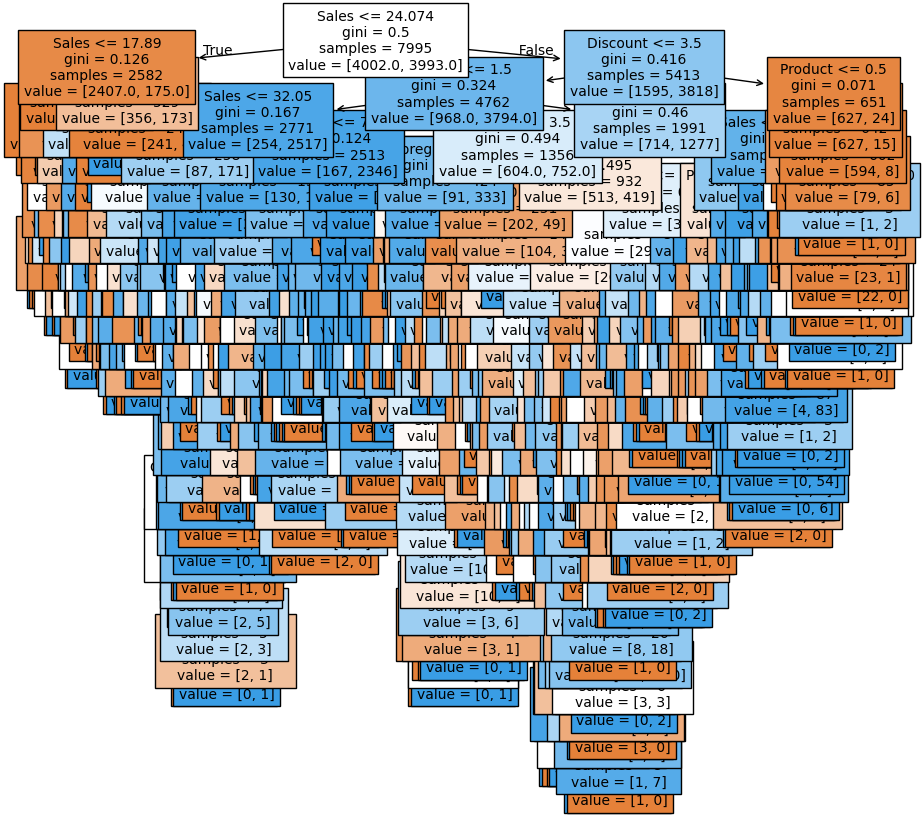

In [ ]:
plt.figure(figsize=(10,10))
plot_tree(dt, filled=True,feature_names=x.columns, fontsize=10)
plt.show()

RANDOM FOREST

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

In [ ]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
best_rf = RandomForestClassifier(**best_params,random_state=42)
best_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_split=10, random_state=42)

In [ ]:
y_pred_rf = best_rf.predict(x_test)

In [ ]:
y_pred_rf = best_rf.predict(x_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest:{accuracy_rf:2f}")

Accuracy of Random Forest:0.898449


SVM (POLYNOMIAL)

In [ ]:
svm_poly = SVC(kernel='poly', C=1.0,gamma='scale')

In [ ]:
svm_poly.fit(x_train, y_train)

SVC(kernel='poly')

In [ ]:
y_pred_svm_poly = svm_poly.predict(x_test)

In [ ]:
y_pred_svm_poly

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
accuracy_svm_poly = accuracy_score(y_test, y_pred_svm_poly)
print(f"Accuracy of Support Vector Machine(Polynomial Kernal): {accuracy_svm_poly}")

Accuracy of Support Vector Machine(Polynomial Kernal): 0.5662831415707854


SIGMOID

In [ ]:
svm_sigmoid = SVC(kernel='sigmoid', C=1.0, gamma='scale')

In [ ]:
svm_sigmoid.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [ ]:
y_pred_svm_sigmoid = svm_sigmoid.predict(x_test)

In [ ]:
y_pred_svm_sigmoid

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
accuracy_svm_sigmoid = accuracy_score(y_test, y_pred_svm_sigmoid)
print(f"Accuracy of Support Vector Machine(Sigmoid kernal): {accuracy_svm_sigmoid}")

Accuracy of Support Vector Machine(Sigmoid kernal): 0.7228614307153577


REGRESSION

LINEAR REGRESSION

In [ ]:
linear_model = LinearRegression()

In [ ]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_lm = linear_model.predict(x_test)

In [ ]:
mse_lm = mean_squared_error(y_test, y_pred_lm)
print(f"Linear Regression - Mean Squared Error:{mse_lm}")

Linear Regression - Mean Squared Error:0.19359641612227213


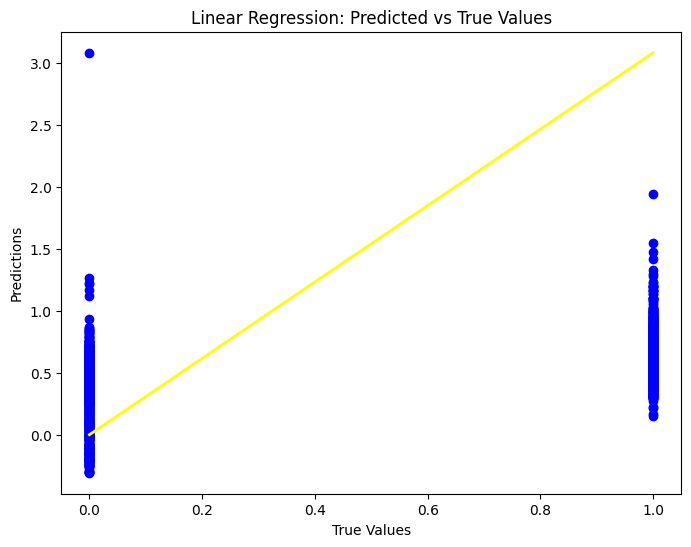

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lm, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_pred_lm.max()],
         color='yellow',lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression: Predicted vs True Values')
plt.show()

DECISION TREE REGRESSOR

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(splitter='best',max_depth=None,min_samples_split=2,
                            min_samples_leaf=1,
                            min_weight_fraction_leaf=0.0, max_features=None, random_state=None,
                            max_leaf_nodes=None, min_impurity_decrease=0.0)

In [ ]:
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_dt_regressor = dt.predict(x_test)

In [ ]:
y_pred_dt_regressor

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
mse_dt_regressor= mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree Regressor - Mean Squared Error: {mse_dt_regressor}")

Decision Tree Regressor - Mean Squared Error: 0.12156078039019509


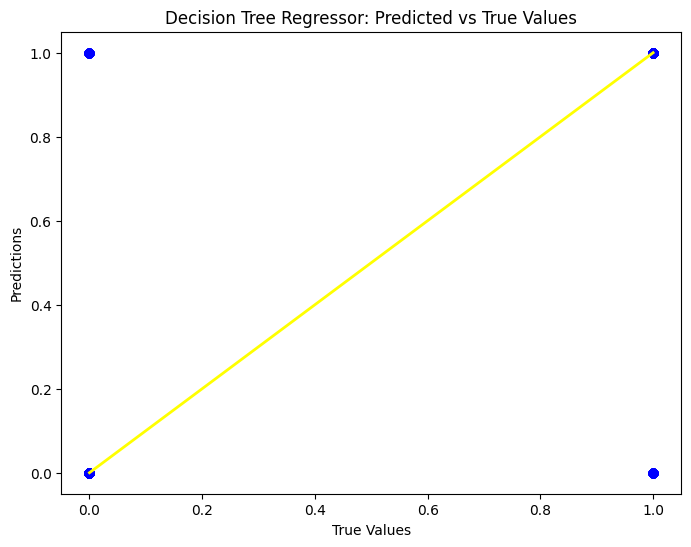

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_dt, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_pred_dt.max()],
         color='yellow',lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Decision Tree Regressor: Predicted vs True Values')
plt.show()

LOGISTIC REGRESSION

In [ ]:
 logistic_model = LogisticRegression()

In [ ]:
logistic_model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
y_pred_lom = logistic_model.predict(x_test)

In [ ]:
y_pred_lom

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
mse_lom = mean_squared_error(y_test, y_pred_lom)

print(f"Logistic Regression - Mean Squared Error: {mse_lom}")

Logistic Regression - Mean Squared Error: 0.2971485742871436


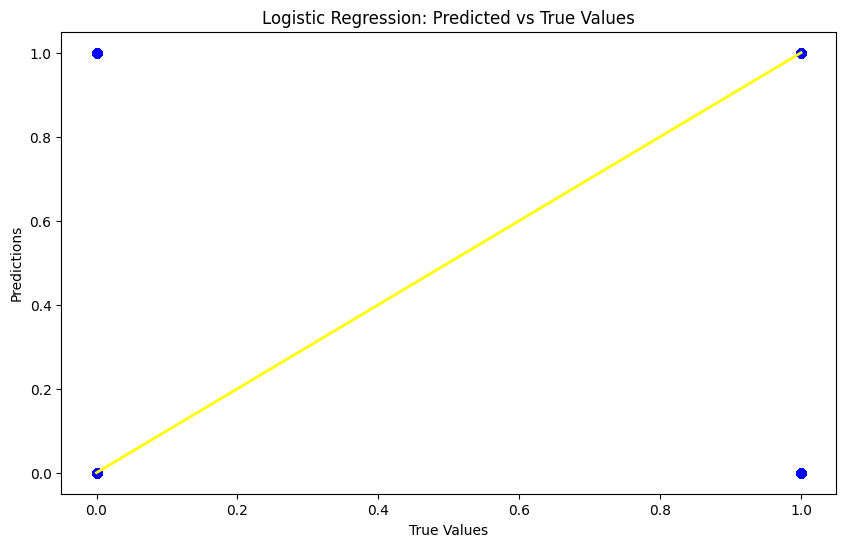

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lom, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_pred_lom.max()],
         color='yellow',lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Logistic Regression: Predicted vs True Values')
plt.show()

MSE OF REGRESSION MODELS

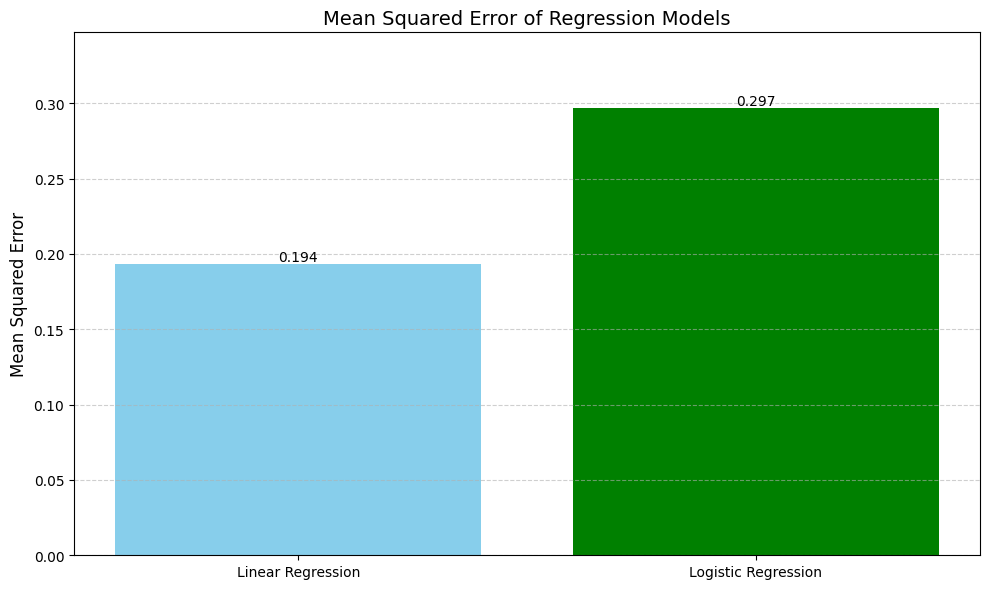

In [ ]:
import matplotlib.pyplot as plt

# MSE data
models = [
    'Linear Regression',
    'Logistic Regression'
]
mse_values = [
    0.19359641612227213,
     0.2971485742871436
]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(models, mse_values, color=['skyblue','green'])

# Add MSE values above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height,
        f'{height:.3f}', ha='center', va='bottom', fontsize=10
    )

# Customizing the plot
plt.title('Mean Squared Error of Regression Models', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.ylim(0, max(mse_values) + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

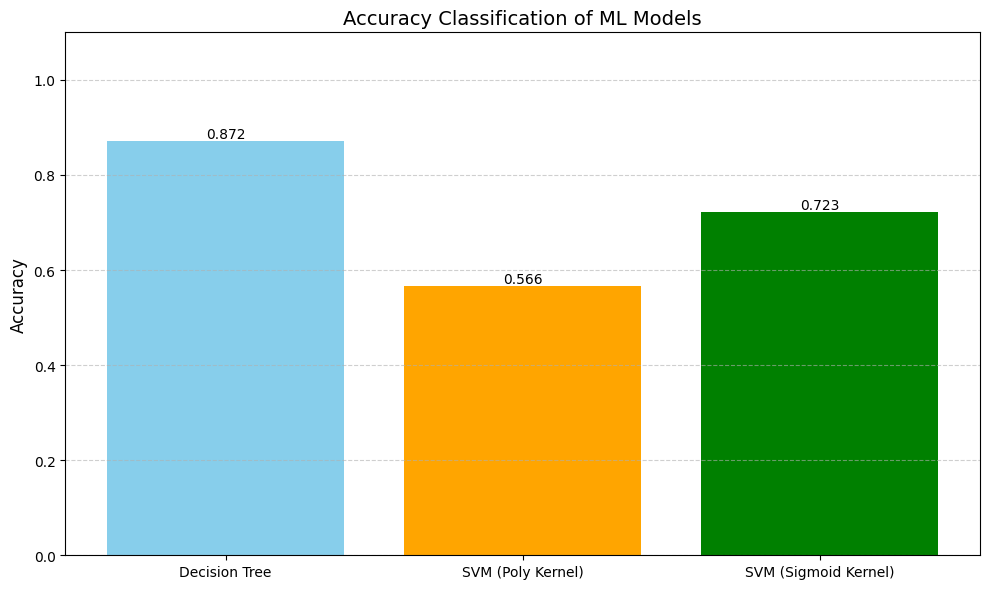

In [ ]:
import matplotlib.pyplot as plt

# Accuracy data
models = [
    'Decision Tree',
    'SVM (Poly Kernel)',
    'SVM (Sigmoid Kernel)'
]
accuracies = [
    0.871935967983992,
    0.5662831415707854,
      0.7228614307153577
]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'orange', 'green', 'purple'])

# Adding accuracy values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height,
        f'{height:.3f}', ha='center', va='bottom', fontsize=10
    )

# Customizing the plot
plt.title('Accuracy Classification of ML Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [ ]:
def get_user_input():
    print("Enter the feature values to predict Profit:")
    country = int(input("Country (e.g., 21): "))
    city = int(input("City (e.g., 73): "))
    region = int(input("Region (e.g., 2): "))
    subregion = int(input("Subregion (e.g., 11): "))
    customer = int(input("Customer (e.g., 23): "))
    industry = int(input("Industry (e.g., 2): "))
    segment = int(input("Segment (e.g., 1): "))
    product = int(input("Product (e.g., 6): "))
    sales = float(input("Sales (e.g., 261.96): "))
    quantity = int(input("Quantity (e.g., 2): "))
    discount = float(input("Discount (e.g., 0): "))

    input_df = pd.DataFrame([[
        country, city, region, subregion, customer, industry,
        segment, product, sales, quantity, discount
    ]], columns=x.columns)

    return input_df

In [ ]:
def predict_profit(input_df):
    predicted = dt.predict(input_df)[0]
    return round(predicted, 4)

In [ ]:
user_input_df = get_user_input()
result = predict_profit(user_input_df)
print(f"\nPredicted Profit: {result}")

Enter the feature values to predict Profit:
Country (e.g., 21): 33
City (e.g., 73): 45
Region (e.g., 2): 78
Subregion (e.g., 11): 96
Customer (e.g., 23): 88
Industry (e.g., 2): 52
Segment (e.g., 1): 31
Product (e.g., 6): 1050
Sales (e.g., 261.96): 5789
Quantity (e.g., 2): 9
Discount (e.g., 0): 0

Predicted Profit: 1
